[![PracticeProbs](https://d33wubrfki0l68.cloudfront.net/b6800cc830e3fd5a3a4c3d9cfb1137e6a4c15c77/ec467/assets/images/transparent-1.png)](https://www.practiceprobs.com/)

# [Defraud The Investors](https://www.practiceprobs.com/problemsets/python-numpy/proficient/defraud-the-investors/)

You've developed a model that predicts the probability a 🏠 house for sale can be flipped for a profit 💸. **Your model isn't very good**, as indicated by its predictions on historic data.

In [16]:
import numpy as np

rng = np.random.default_rng(123)
targets = rng.uniform(low=0, high=1, size=20) >= 0.6
preds = np.round(rng.uniform(low=0, high=1, size=20), 2)

print(targets)
print(preds)
# [ True False False ... False True False]
# [ 0.23  0.17  0.50 ...  0.87 0.30  0.53]

[ True False False False False  True  True False  True  True False False
  True False  True  True  True False  True False]
[0.23 0.17 0.5  0.58 0.18 0.01 0.47 0.73 0.92 0.63 0.92 0.86 0.22 0.87
 0.73 0.28 0.8  0.87 0.3  0.53]


Your investors want to see these results, but you're afraid to share them. You devise the following algorithm to make your predictions look better without looking artificial.

```
Step 1: 
  Choose 5 random indexes (without replacement)

Step 2: 
  Perfectly reorder the prediction scores at these indexes 
  to optimize the accuracy of these 5 predictions
```

**For example**  

If you had these prediction scores and truths

```
indexes: [   0,     1,    2,     3,    4]
scores:  [ 0.3,   0.8,  0.2,   0.6,  0.3]
truths:  [True, False, True, False, True]
```

and you randomly selected indexes 1, 2, and 4, you would reorder their scores like this.

```
indexes:    [   0,     1,    2,     3,    4]
old_scores: [ 0.3,   0.8,  0.2,   0.6,  0.3]
new_scores: [ 0.3,   0.2,  0.3,   0.6,  0.8]
truths:     [True, False, True, False, True]
```

This boosts your accuracy rate from 0% to 20%.

Here's some code to help you evaluate the accuracy of your predictions before and after your changes.

In [17]:
def accuracy_rate(preds, targets):
    return np.mean((preds >= 0.5) == targets)

In [18]:
# Accuracy before finagling
accuracy_rate(preds, targets)  # 0.3

0.3

---

In [19]:
rng = np.random.default_rng(1234567)
new_idxs = rng.choice(20, 5, replace=False)
remain_idxs = [i for i in range(20) if i not in new_idxs]

In [20]:
from itertools import permutations as perm

# split fudge scores from remainder
fudge = preds[new_idxs]
remain = preds[remain_idxs]

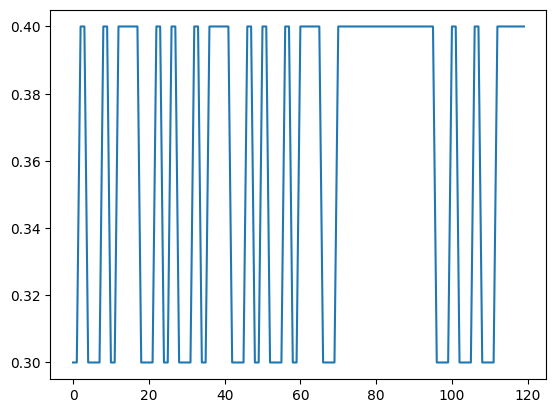

In [23]:
# create function to permute fudge
fudge_perm = [p for p in perm(fudge)]

# fuse with remainder and check scores
def fused_acc(fudge_p, remain, targets, new_idxs, remain_idxs):
    # create and fill scores to assess
    new_scores = np.empty(len(targets))
    new_scores[new_idxs] = fudge_p
    new_scores[remain_idxs] = remain
    # return accuracy
    return accuracy_rate(new_scores, targets)

# iterate, record scores, keep track of permutations
acc = np.zeros(len(fudge_perm))
for i, fp in enumerate(fudge_perm):
    acc[i] = fused_acc(fp, remain, targets, new_idxs, remain_idxs)

import matplotlib.pyplot as plt
plt.plot(acc)

In [24]:
# select maximum score and utilize min permutation
preds[new_idxs] = fudge_perm[np.argmax(acc)]

# accuracy
print("Accuracy:", accuracy_rate(preds, targets))

Accuracy: 0.4


In [ ]:
# sanity check on number of permutations above
from math import factorial
def nPr(n, r):
    return factorial(n) / factorial(n-r)
nPr(5, 5)

## [See our solution!](https://www.practiceprobs.com/problemsets/python-numpy/proficient/defraud-the-investors/solution/)